# **Movie Recommendation System**

### Code written by: Vinayak Ramachandra Bhosale  & Daniel Cisneros

# CAP5610 Project

## **Exploratory Data Analysis**

In [55]:
# Libraries

# Data Analysis 
import pandas as pd
import numpy as np
import re
import scipy.stats as st

# Visualization 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Extraction

In [2]:
movies = pd.read_csv('C:/Users/Pinky/Desktop/UCF Assignment/2nd sem/Machine Learning/Check point 1/ml-25m/movies.csv')
ratings = pd.read_csv('C:/Users/Pinky/Desktop/UCF Assignment/2nd sem/Machine Learning/Check point 1/ml-25m/ratings.csv')

#### **Exploring Data**

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [4]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


**Data types of data**

In [5]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [6]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

**Extracting Numerical and Categorical Features**

In [7]:
# Numerical Features for Movies

movie_num_features = movies.select_dtypes(include = [np.number])
movie_num_features.columns

Index(['movieId'], dtype='object')

In [8]:
# Numerical Features for Ratings

rating_num_features = ratings.select_dtypes(include = [np.number])
rating_num_features.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [9]:
# Categorical Features for Movies

movie_cat_features = movies.select_dtypes(include= [object])
movie_cat_features.columns

Index(['title', 'genres'], dtype='object')

In [10]:
# Categorical Features for Ratings

rating_cat_features = ratings.select_dtypes(include= [object])
rating_cat_features.columns

Index([], dtype='object')

**Missing Values Percentage**

In [11]:
# Movies

movie_percentage = movies.isnull().mean()*100
movie_percentage = movie_percentage.to_frame("nulls")
movie_percentage.sort_values("nulls", inplace = True, ascending = False)
movie_percentage

,nulls
movieId,0.0
title,0.0
genres,0.0


In [12]:
# Ratings

rating_percentage = ratings.isnull().mean()*100
rating_percentage = rating_percentage.to_frame("nulls")
rating_percentage.sort_values("nulls", inplace = True, ascending = False)
rating_percentage

,nulls
userId,0.0
movieId,0.0
rating,0.0
timestamp,0.0


In [13]:
print(movie_cat_features["genres"].value_counts())

Drama                                            9056
Comedy                                           5674
(no genres listed)                               5062
Documentary                                      4731
Comedy|Drama                                     2386
                                                 ... 
Adventure|Crime|Mystery|Romance                     1
Action|Adventure|Fantasy|Mystery|Sci-Fi             1
Action|Adventure|Comedy|Drama|Romance|Western       1
Action|Adventure|War|Western                        1
Comedy|Drama|Fantasy|Romance|Sci-Fi                 1
Name: genres, Length: 1639, dtype: int64


In [14]:
print(movie_cat_features["title"].value_counts())

Dracula (1931)                                            2
Stranded (2015)                                           2
The Plague (2006)                                         2
Good People (2014)                                        2
Home (2008)                                               2
                                                         ..
The Reports on Sarah and Saleem (2018)                    1
Campus Special Investigator Hikaruon (1987)               1
The House of the Yellow Carpet (1983)                     1
Last Detail, The (1973)                                   1
Tora-san Our Lovable Tramp (Otoko wa tsurai yo) (1969)    1
Name: title, Length: 62325, dtype: int64


**Cleaning Titles of Movies**

In [15]:
# Function for Cleaning Titles of Movies

def cleaning_titles(titles):
    
    titles = re.sub("[^a-zA-Z0-9 ]", "", titles)
    return titles

In [16]:
movies["clean_titles"] = movies["title"].apply(cleaning_titles)

In [17]:
movies

,movieId,title,genres,clean_titles
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
62418,209157,We (2018),Drama,We 2018
62419,209159,Window of the Soul (2001),Documentary,Window of the Soul 2001
62420,209163,Bad Poems (2018),Comedy|Drama,Bad Poems 2018
62421,209169,A Girl Thing (2001),(no genres listed),A Girl Thing 2001


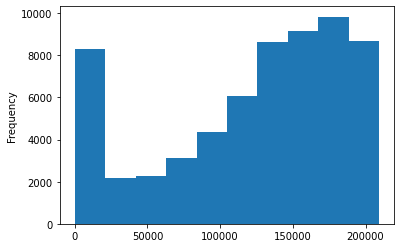

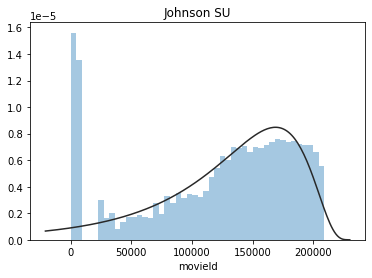

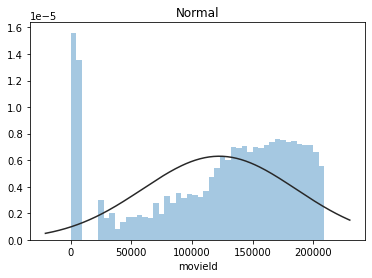

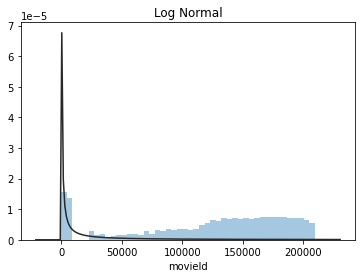

<Figure size 432x288 with 0 Axes>

In [57]:
try:
    movies["movieId"].astype(int).plot.hist()
    plt.show()
    y = movies["movieId"]
    plt.figure(1); plt.title("Johnson SU")
    sns.distplot(y, kde= False, fit=st.johnsonsu)

    plt.figure(2); plt.title("Normal")
    sns.distplot(y, kde= False, fit=st.norm)

    plt.figure(3); plt.title("Log Normal")
    sns.distplot(y, kde= False, fit=st.lognorm)

    plt.figure(4)
    sns.displot(y)
    y.describe()
except Exception as e:
    pass

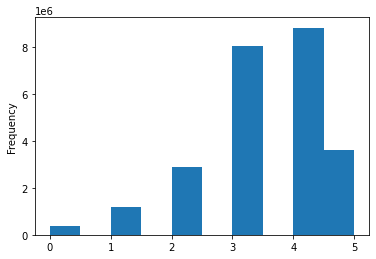

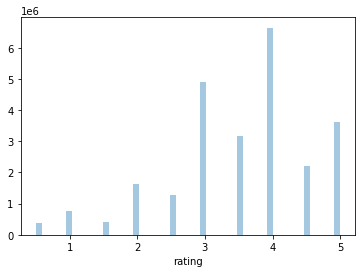

In [58]:
try:
    ratings["rating"].astype(int).plot.hist()
    plt.show()
    y2 = ratings["rating"]
    plt.figure(1); 
    sns.distplot(y2, kde= False)

    sns.displot(y2)
    y2.describe()
except Exception as e:
    pass

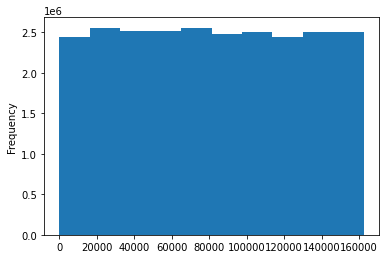

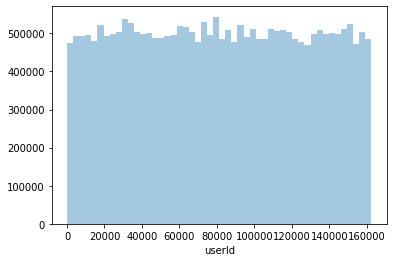

In [59]:
try:
    ratings["userId"].astype(int).plot.hist()
    plt.show()

    y3 = ratings["userId"]
    plt.figure(1); 
    sns.distplot(y3, kde= False)



    sns.displot(y3)
    y3.describe()
except Exception as e:
    pass

<AxesSubplot:>

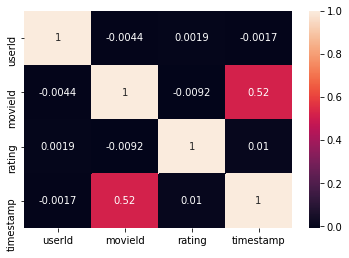

In [21]:
rate_correlation = rating_num_features.corr()
sns.heatmap(rate_correlation, annot = True)

<AxesSubplot:>

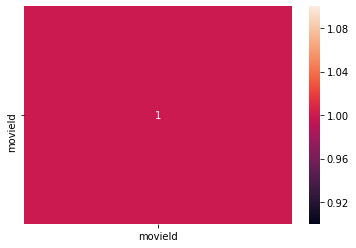

In [22]:
mov_correlation = movie_num_features.corr()
sns.heatmap(mov_correlation, annot = True)

In [23]:
movies

,movieId,title,genres,clean_titles
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
62418,209157,We (2018),Drama,We 2018
62419,209159,Window of the Soul (2001),Documentary,Window of the Soul 2001
62420,209163,Bad Poems (2018),Comedy|Drama,Bad Poems 2018
62421,209169,A Girl Thing (2001),(no genres listed),A Girl Thing 2001


In [24]:
books = pd.read_csv("C:\\Users\\Pinky\\Desktop\\UCF Assignment\\2nd sem\\Machine Learning\\books\\books\\books_new.csv")

In [25]:
books

,Title,Author,Genre,SubGenre,Height,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",tech,signal_processing,228,Wiley
1,Data Smart,"Foreman, John",tech,data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",tech,mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",science,economics,179,HarperCollins
4,Orientalism,"Said, Edward",nonfiction,history,197,Penguin
...,...,...,...,...,...,...
206,Structure and Randomness,"Tao, Terence",science,mathematics,252,NaN
207,Image Processing with MATLAB,"Eddins, Steve",tech,signal_processing,241,NaN
208,Animal Farm,"Orwell, George",fiction,classic,180,NaN
209,"Idiot, The","Dostoevsky, Fyodor",fiction,classic,197,NaN


In [26]:
len(books)

211

In [27]:
max(movies["movieId"])

209171

In [28]:
booksid = [i for i in range(209172,209383)]
len(booksid)

211

In [29]:
books["bookid"] = booksid

In [30]:
books = books[["bookid","Title","Genre"]]

In [31]:
books["clean_titles"] = books["Title"].apply(cleaning_titles)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
books

,bookid,Title,Genre,clean_titles
0,209172,Fundamentals of Wavelets,tech,Fundamentals of Wavelets
1,209173,Data Smart,tech,Data Smart
2,209174,God Created the Integers,tech,God Created the Integers
3,209175,Superfreakonomics,science,Superfreakonomics
4,209176,Orientalism,nonfiction,Orientalism
...,...,...,...,...
206,209378,Structure and Randomness,science,Structure and Randomness
207,209379,Image Processing with MATLAB,tech,Image Processing with MATLAB
208,209380,Animal Farm,fiction,Animal Farm
209,209381,"Idiot, The",fiction,Idiot The


In [33]:
books.columns = movies.columns
movies = movies.append(books, ignore_index=True)

In [34]:
movies

,movieId,title,genres,clean_titles
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
62629,209378,Structure and Randomness,science,Structure and Randomness
62630,209379,Image Processing with MATLAB,tech,Image Processing with MATLAB
62631,209380,Animal Farm,fiction,Animal Farm
62632,209381,"Idiot, The",fiction,Idiot The


In [35]:
movies = movies.sample(frac = 1)

In [36]:
books

,movieId,title,genres,clean_titles
0,209172,Fundamentals of Wavelets,tech,Fundamentals of Wavelets
1,209173,Data Smart,tech,Data Smart
2,209174,God Created the Integers,tech,God Created the Integers
3,209175,Superfreakonomics,science,Superfreakonomics
4,209176,Orientalism,nonfiction,Orientalism
...,...,...,...,...
206,209378,Structure and Randomness,science,Structure and Randomness
207,209379,Image Processing with MATLAB,tech,Image Processing with MATLAB
208,209380,Animal Farm,fiction,Animal Farm
209,209381,"Idiot, The",fiction,Idiot The


In [37]:
movies

,movieId,title,genres,clean_titles
49550,179113,Close-Knit (2017),Children|Drama,CloseKnit 2017
1785,1874,Still Breathing (1997),Comedy|Romance,Still Breathing 1997
1451,1499,Anaconda (1997),Action|Adventure|Thriller,Anaconda 1997
22109,113524,Campus Rhythm (Fraternity Sweetheart) (1943),Comedy|Romance,Campus Rhythm Fraternity Sweetheart 1943
31247,138110,186 Dollars to Freedom (2012),Action|Drama,186 Dollars to Freedom 2012
...,...,...,...,...
55214,191399,All Your Favorite Shows! (2015),Animation,All Your Favorite Shows 2015
22006,113092,Kidnapped For Christ (2014),Documentary,Kidnapped For Christ 2014
1406,1446,Kolya (Kolja) (1996),Comedy|Drama,Kolya Kolja 1996
20985,108516,Visitors (2013),Documentary,Visitors 2013


# Inverse document frequency

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))

tfidf = vectorizer.fit_transform(movies["clean_titles"])

# Implementing Search Function

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def search_engine(title):
    title = cleaning_titles(title)
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies.iloc[indices].iloc[::-1]
    return results

In [40]:
import ipywidgets as widgets
from IPython.display import display

movie_input = widgets.Text(
    value='The Hulk',
    description='Movie/Book Title:',
    disabled=False
)
movie_list = widgets.Output()

def when_typed(data):
    with movie_list:
        movie_list.clear_output()
        title = data["new"]
        if len(title) > 4:
            display(search_engine(title))

movie_input.observe(when_typed, names='value')
display(movie_input, movie_list)

Text(value='The Hulk', description='Movie/Book Title:')

Output()

# Implementing the recommender system model

In [41]:
def recommender_model(movie_id, already_watched=[]):
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
    
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    return rec_percentages.head(10).merge(movies, left_index=True, right_on="movieId")[["score", "title", "genres"]]

# Improved (Check point 2)

In [42]:
def recommender_model(movie_id, already_watched=[]):
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
    
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    rec_df = rec_percentages.head(10).merge(movies, left_index=True, right_on="movieId")[["score", "title", "genres"]]
    rec_df["Watched/Read"] = rec_df["title"].isin(already_watched)
    return rec_df

In [43]:
movie_name_input = widgets.Text(
    value='Toy Story',
    description='Movie/Book Title:',
    disabled=False
)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 4:
            results = search_engine(title)
            movie_id = results.iloc[0]["movieId"]
            display(recommender_model(movie_id,["Toy Story 3 (2010)",
                                               "How to Train Your Dragon (2010)",
                                               "The Lego Movie (2014)",
                                                "Frozen (2013)",
                                               "Inside Out (2015)"]))

movie_name_input.observe(on_type, names='value')

display(movie_name_input, recommendation_list)

Text(value='Toy Story', description='Movie/Book Title:')

Output()

# Evaluation

In [51]:
import random
from sklearn.model_selection import train_test_split

train, test = train_test_split(ratings, test_size=0.2, random_state=42)

def mean_average_precision(actual, predicted):
    ap_sum = 0.0
    num_hits = 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            ap_sum += num_hits / (i + 1.0)
    return ap_sum / len(actual)

average_precision_sum = 0.0
for user_id in test["userId"].unique():
    user_ratings = test[test["userId"] == user_id]
    if len(user_ratings) > 0:
        watched_movies = user_ratings[user_ratings["rating"] > 4]["movieId"].values
        recommendations = recommender_model(user_ratings.iloc[0]["movieId"], watched_movies)["movieId"].values
        
        average_precision_sum += mean_average_precision(watched_movies, recommendations)
    
mean_average_precision = average_precision_sum / len(test["userId"].unique())

In [52]:
print("Mean Average Precision @ 10:",mean_average_precision)

Mean Average Precision @ 10: 0.44563
